In [ ]:
# 기존 모델


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# MNIST 데이터 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 전처리
# 이미지 데이터를 0-1 범위로 정규화
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 레이블을 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 데이터 확인
print(f"훈련 데이터: {X_train.shape}, 테스트 데이터: {X_test.shape}")
print(f"훈련 레이블: {y_train.shape}, 테스트 레이블: {y_test.shape}")

# 몇 개의 샘플을 시각화
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10개의 클래스
])

model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping])

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss:.4f}, 테스트 정확도: {test_acc:.4f}")

In [ ]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
#  need to change uint8 -> float

In [6]:
import cv2

In [7]:
# cv2.imshow('', X_train[0])
# cv2.waitKey()
# cv2.destroyAllWindows()

In [8]:
import matplotlib.pyplot as plt


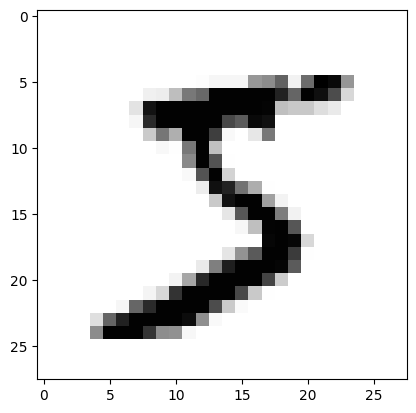

In [9]:
plt.imshow(X_train[0], cmap="Grays")
plt.show()

In [10]:
import sys

In [11]:
for i in X_train[0]:
    for j in i:
        sys.stdout.write("%-3s" %j)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [12]:
# 차원 변환 후, 데스트셋과 학습셋으로 나누기
X_train = X_train.reshape( X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape( X_test.shape[0], 784).astype('float32') / 255

#1. 원-핫 인코딩이 필요한 경우:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
X_train.reshape( (X_train.shape[0], 28*28))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
X_train.reshape((X_train.shape[0], 28*28)).shape

(60000, 784)

In [15]:
X_train.dtype

dtype('float32')

In [16]:
X_train = X_train.reshape( (X_train.shape[0], 28*28)) / 255

In [17]:
X_train.dtype, y_train.dtype

(dtype('float32'), dtype('float64'))

In [18]:
X_test = X_test.reshape( (X_test.shape[0], 28*28)) / 255

In [19]:
X_test.dtype

dtype('float32')

In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [21]:
import pandas as pd

In [22]:
y_train = y_train.reshape(-1, 10)
y_test = y_test.reshape(-1, 10)
y_train.dtype

dtype('float64')

In [23]:
df = pd.DataFrame(y_train)
print(df.head())

     0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


In [24]:
from tensorflow.keras.utils import to_categorical


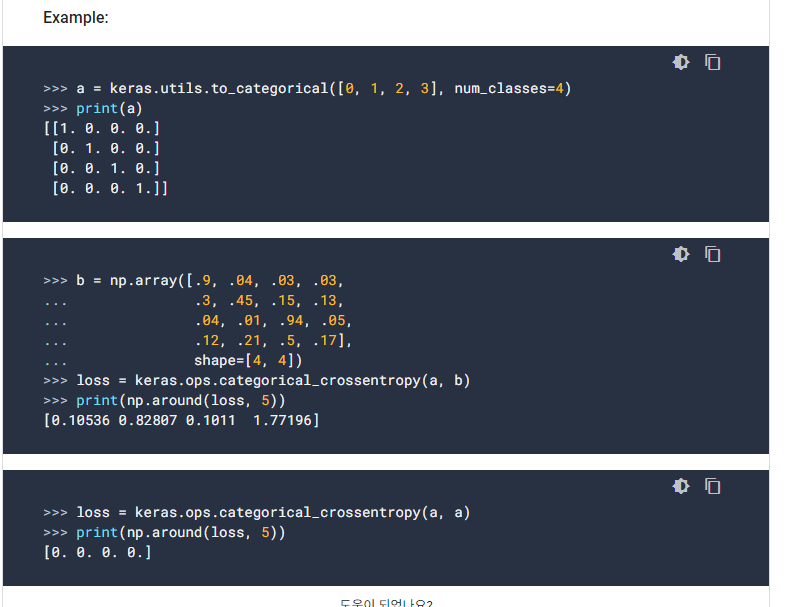

In [25]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [26]:

y_train.size

600000

In [27]:
to_categorical(y_train, 10)[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
y_train = to_categorical(y_train, 10)

In [29]:
y_test = to_categorical(y_test, 10)

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()

In [33]:
model.add( Dense(512, input_dim=784, activation='relu'))
model.add( Dense(10, activation='softmax'))
model.summary()

c:\anaconda3\envs\practice_mldl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
%pwd

'c:\\shjung\\pythonExam\\240826'

In [35]:
# 딥러닝 실행 환경을 위해 오차 함수로 categorical_crossentropy, 최적화 함수로 adam을 사용
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # 여기서 오타를 수정
              metrics=['accuracy'])
# model_path = './model/MNIST_mlp_model.keras'

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [37]:
# y_train의 차원이 잘못되었을 경우 아래 코드로 변환
# if y_train.ndim == 4:
#     y_train = y_train.reshape(-1, 10)
#     y_test = y_test.reshape(-1, 10)

In [38]:
X_train.shape

(60000, 784)

In [39]:
y_train.shape

(60000, 10, 10)

In [40]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10, 10)


In [43]:
y_train = y_train.reshape(-1, 10)
y_test = y_test.reshape(-1, 10)

In [44]:
# modelpath = "./model/all/MNIST_{epoch:02d}-{val_accuracy:.4f}.keras"
modelpath = "./model/MNIST_MLP.keras"
 

checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss',
                               save_best_only=True,                                
                               verbose=1 )
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping_callback, checkpointer])
 

Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

# 위에는 참고용

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 데이터 로드 및 전처리
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 콜백 정의
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
modelpath = "./model/MNIST2_model.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True, verbose=1)

# 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/10


c:\anaconda3\envs\practice_mldl\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


745/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8399 - loss: 0.4962
Epoch 1: val_loss improved from inf to 0.08059, saving model to ./model/MNIST2_model.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8406 - loss: 0.4939 - val_accuracy: 0.9750 - val_loss: 0.0806
Epoch 2/10
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9806 - loss: 0.0617
Epoch 2: val_loss improved from 0.08059 to 0.05471, saving model to ./model/MNIST2_model.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9806 - loss: 0.0617 - val_accuracy: 0.9841 - val_loss: 0.0547
Epoch 3/10
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9868 - loss: 0.0420
Epoch 3: val_loss improved from 0.05471 to 0.05133, saving model to ./model/MNIST2_model.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9868 - loss: 0.0420 - val_accuracy: 0.9852 - val_loss: 0.0513
Epoch 4/10
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9889 - loss: 0.0335
Epoch 4: val_loss improved from 0.0

In [47]:
list (history.history)

['accuracy', 'loss', 'val_accuracy', 'val_loss']

In [48]:
# 정확도
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])


0.995437502861023
0.9892500042915344


In [49]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0381


[0.029009109362959862, 0.9915000200271606]

In [ ]:
history.history

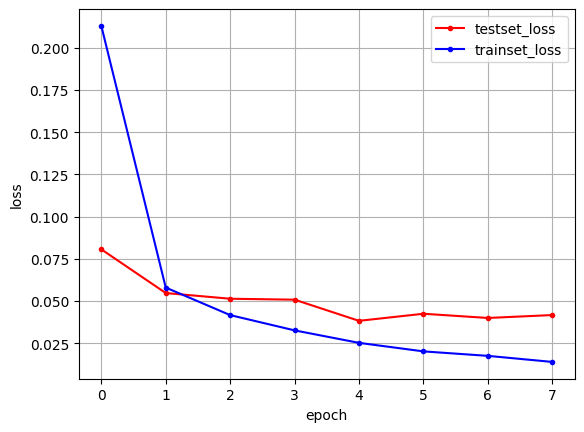

In [50]:
import numpy as np
import pandas as pd



history_df = pd.DataFrame(data=history.history)
# history_df.head()
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue' , label='trainset_loss')
plt.legend(loc=1)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss') 
plt.show()
